In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cwd=os.getcwd()
data=pd.read_csv(cwd+'/AMLdata.csv')
data.head()

,PARTY_ID,T_AMT,T_CNT,T_DT_CNT,T_HOUR,T_AVG,T_MAX,T_MIN,T_STD,T_VAR,...,CHN_RISK_AREA_CNT,OVERSEA_RISK_AREA_CNT,TRANS_AREA_CNT,IN_AREA,OPP_CNT,OPP_AVG,DC_RATE,GD_DATE,AGE,AREA
0,1121447861,77.60,3,1,1,6.46,30.4,20.3,4.19,17.54,...,(null),(null),1,1,1,0.083,0.000,(null),57,3201
1,1120030352,2193.00,1,1,1,182.75,2193.0,2193.0,0.00,0.00,...,(null),(null),(null),(null),(null),(null),(null),(null),(null),(null)
2,1120039341,5.70,1,1,1,0.47,5.7,5.7,0.00,0.00,...,(null),(null),1,1,1,0.083,0.000,(null),(null),(null)
3,1120052737,219.52,4,1,3,18.29,160.0,9.8,61.29,3756.15,...,(null),(null),1,1,4,0.333,0.000,(null),(null),(null)
4,1120085535,13.00,1,1,1,1.08,13.0,13.0,0.00,0.00,...,(null),(null),1,1,1,0.083,0.000,(null),(null),(null)


In [ ]:
data=data.replace('(null)',0)
data.head(5)

,PARTY_ID,T_AMT,T_CNT,T_DT_CNT,T_HOUR,T_AVG,T_MAX,T_MIN,T_STD,T_VAR,...,CHN_RISK_AREA_CNT,OVERSEA_RISK_AREA_CNT,TRANS_AREA_CNT,IN_AREA,OPP_CNT,OPP_AVG,DC_RATE,GD_DATE,AGE,AREA
0,1121447861,77.60,3,1,1,6.46,30.4,20.3,4.19,17.54,...,0,0,1,1,1,0.083,0.000,0,57,3201
1,1120030352,2193.00,1,1,1,182.75,2193.0,2193.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,1120039341,5.70,1,1,1,0.47,5.7,5.7,0.00,0.00,...,0,0,1,1,1,0.083,0.000,0,0,0
3,1120052737,219.52,4,1,3,18.29,160.0,9.8,61.29,3756.15,...,0,0,1,1,4,0.333,0.000,0,0,0
4,1120085535,13.00,1,1,1,1.08,13.0,13.0,0.00,0.00,...,0,0,1,1,1,0.083,0.000,0,0,0


In [ ]:
data_01=data.iloc[:,1:]

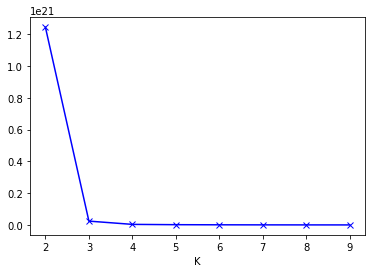

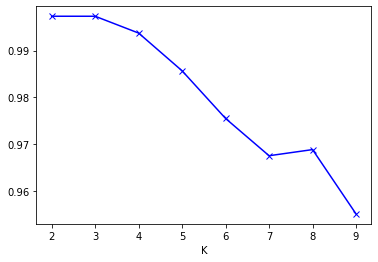

CPU times: user 3.36 s, sys: 1.88 s, total: 5.24 s
Wall time: 2.82 s


In [ ]:
%%time
K=range(2,10)
mean_distortions=[]
silhouette=[]
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=42)
    kmeans.fit(data_01)
    #手肘法
    mean_distortions.append(kmeans.inertia_)
    #轮廓系数法
    silhouette.append(metrics.silhouette_score(data_01, kmeans.labels_, metric='euclidean'))

plt.plot(K,mean_distortions,'bx-')
plt.xlabel('K')
font=FontProperties(size=20)
plt.show()

plt.plot(K,silhouette,'bx-')
plt.xlabel('K')
font=FontProperties(size=20)
plt.show()

In [ ]:
diff=[]
for i in range(0,len(mean_distortions)-1):
    diff.append(mean_distortions[i]-mean_distortions[i+1])
final_k=diff.index(max(diff))+3
print('final k is:',final_k)

final k is: 3


In [ ]:
#数据标准化处理，有可能不需要
Standard_data=StandardScaler().fit_transform(data.iloc[:,1:])
Standard_data=pd.DataFrame(data=Standard_data,columns=list(Standard_data))
#Standard_data.head(5)

%%time
K=range(2,20)
mean_distortions=[]
silhouette=[]
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=42)
    kmeans.fit(Standard_data)
    #手肘法
    mean_distortions.append(kmeans.inertia_)
    #轮廓系数法
    silhouette.append(metrics.silhouette_score(Standard_data, kmeans.labels_, metric='euclidean'))

plt.plot(K,mean_distortions,'bx-')
plt.xlabel('K')
font=FontProperties(size=20)
plt.show()

plt.plot(K,silhouette,'bx-')
plt.xlabel('K')
font=FontProperties(size=20)
plt.show()

final_k_standard=silhouette.index(max(silhouette))+2

In [ ]:
#根据结果取K值，进行建模
final_model=KMeans(n_clusters=final_k,init="k-means++",random_state=42)
final_model.fit(data_01)
km_label=pd.DataFrame(final_model.labels_,columns=['pred_label'])
km_data=pd.concat([data,km_label],axis=1)
km_data['pred_label'].value_counts()

final k is: 2


In [ ]:
#团簇可视化



In [ ]:
#另外：需要加备用字段（现在没有加）
risk=pd.concat((km_data[km_data['pred_label']==1],km_data[km_data['pred_label']==2]),axis=0)
risk 

,PARTY_ID,T_AMT,T_CNT,T_DT_CNT,T_HOUR,T_AVG,T_MAX,T_MIN,T_STD,T_VAR,...,OVERSEA_RISK_AREA_CNT,TRANS_AREA_CNT,IN_AREA,OPP_CNT,OPP_AVG,DC_RATE,GD_DATE,AGE,AREA,pred_label
254,1122816892,750000.0,4,1,2,62500.00,500000.0,50000.0,184983.11,3.421875e+10,...,0,1,2,3,0.250,0.000,0,52,4101,1
707,1121438607,350000.0,2,1,1,29166.66,300000.0,50000.0,125000.00,1.562500e+10,...,0,1,1,1,0.083,0.000,0,43,3201,2


In [1]:
!pip list

Package            Version
------------------ ---------
addict             2.4.0
appnope            0.1.2
backcall           0.2.0
certifi            2022.6.15
charset-normalizer 2.0.12
click              8.1.3
colorama           0.4.5
commonmark         0.9.1
cycler             0.11.0
debugpy            1.4.1
decorator          5.0.9
entrypoints        0.3
fonttools          4.33.3
idna               3.3
importlib-metadata 4.12.0
ipykernel          6.3.1
ipython            7.27.0
ipython-genutils   0.2.0
jedi               0.18.0
jupyter-client     7.0.2
jupyter-core       4.7.1
kiwisolver         1.4.3
Markdown           3.3.7
matplotlib         3.5.2
matplotlib-inline  0.1.3
mmcv-full          1.5.3
model-index        0.1.11
nest-asyncio       1.5.1
numpy              1.22.2
opencv-python      4.6.0.66
openmim            0.2.0
ordered-set        4.1.0
packaging          21.3
pandas             1.4.3
parso              0.8.2
pexpect            4.8.0
pickleshare        0.7.5
Pillow   